In [127]:
import numpy as np
import scipy.optimize as SciOpt
import scipy.stats as SciStat
import scipy.special as SciSpec
import matplotlib.pyplot as plt

In [128]:
#First we need to import data
#I am using pathlib to make path string
#platform indepenedent
from pathlib import Path
Folder = Path("G:/Classes/PHYS5730-7730/2022/hwk 3/")
File1 = Folder / "D1.txt"
File2 = Folder / "D2.txt"
File3 = Folder / "D3.txt"
File4 = Folder / "D4.txt"
File5 = Folder / "D5.txt"

#Now just read each file in.
#There is just one number per line
#so no split of line necessary.
d1=[]; d2=[]; d3=[]; d4=[]; d5=[]; 
with open(File1) as f:
    for line in f:
        d1.append(float(line))
d1=np.array(d1)
with open(File2) as f:
    for line in f:
        d2.append(float(line))
with open(File3) as f:
    for line in f:
        d3.append(float(line))
with open(File4) as f:
    for line in f:
        d4.append(float(line))
with open(File5) as f:
    for line in f:
        d5.append(float(line))
d1=np.array(d1)
d2=np.array(d2)
d3=np.array(d3)
d4=np.array(d4)
d5=np.array(d5)

The parameters if D1 were lognormal are:
[-15.03738551  63.41326145]


<ipython-input-129-622f31b5a656>:16: RuntimeWarning: invalid value encountered in double_scalars
  val=-np.sqrt(2/np.pi)*np.exp(-Zc*Zc)/(1-SciSpec.erf(Zc))
<ipython-input-129-622f31b5a656>:16: RuntimeWarning: divide by zero encountered in double_scalars
  val=-np.sqrt(2/np.pi)*np.exp(-Zc*Zc)/(1-SciSpec.erf(Zc))


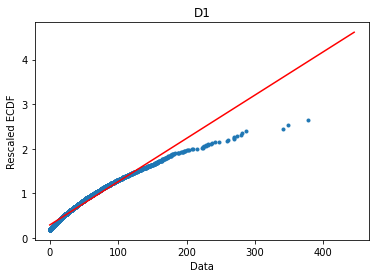

<ipython-input-129-622f31b5a656>:16: RuntimeWarning: divide by zero encountered in double_scalars
  val=-np.sqrt(2/np.pi)*np.exp(-Zc*Zc)/(1-SciSpec.erf(Zc))


The parameters if D2 were lognormal are:
[-5.53077636 27.18916324]


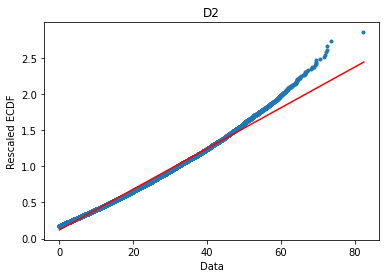

The parameters if D3 were lognormal are:
[-0.52303965 29.86851418]


<ipython-input-129-622f31b5a656>:16: RuntimeWarning: divide by zero encountered in double_scalars
  val=-np.sqrt(2/np.pi)*np.exp(-Zc*Zc)/(1-SciSpec.erf(Zc))


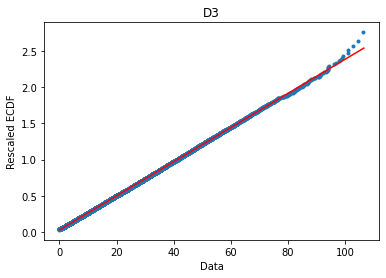

The parameters if D4 were lognormal are:
[-10.23398596  46.24451995]


<ipython-input-129-622f31b5a656>:16: RuntimeWarning: divide by zero encountered in double_scalars
  val=-np.sqrt(2/np.pi)*np.exp(-Zc*Zc)/(1-SciSpec.erf(Zc))


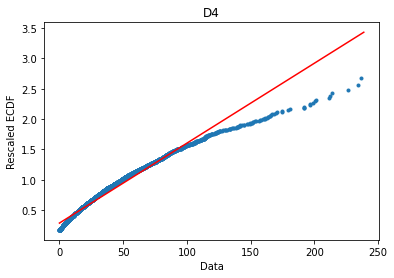

The parameters if D5 were lognormal are:
[-32.67358464   5.32709898]


<ipython-input-129-622f31b5a656>:16: RuntimeWarning: divide by zero encountered in double_scalars
  val=-np.sqrt(2/np.pi)*np.exp(-Zc*Zc)/(1-SciSpec.erf(Zc))


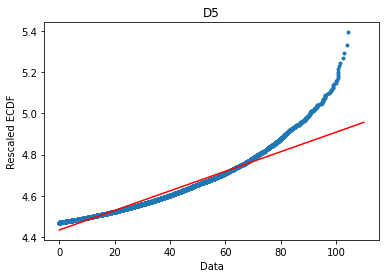

In [129]:
#Let's do log-normal but now we will use logL'=0 to get
#parameter values
def Lprobplot_analysis(x,STR):
    #It helps to compute the number of data points first
    N=np.size(x)
    #Also the cutoff threshold is:
    C=1
    #And now the logL' for pdf truncated at 0
    #The code in this case is arguably simpler than 
    #for finding maximum likelihood directly
    def tG(p):
        #p[0]=M; p[1]=S
        Z =(np.log(x)-p[0])/p[1];
        Zc=(np.log(C)-p[0])/(p[1]*np.sqrt(2));
        #
        val=-np.sqrt(2/np.pi)*np.exp(-Zc*Zc)/(1-SciSpec.erf(Zc))
        retM=N*val+np.sum(Z);
        #
        retS=N*(val*Zc-1)+np.sum(np.power(Z,2))  
        return [retM,retS]
    #Estimate the parameters (here mu and sigma)
    #0 and 100 are some random starting guesses
    soln=SciOpt.root(tG,[0,1],method='lm');
    #When we look for maximum of likelihood directly
    #(in the main solution notebook) we get [0.03898662 29.58272712]
    #Here we look for maximum of likelihood
    #by looking for zeros of derivatives and
    #we get a very close answer [-0.52303965 29.86851418] 
    #For d3 data set (the only lognormal set)
    print('The parameters if ' + STR + ' were lognormal are:')
    print(soln.x)
    #OK, now that we know the parameters roughly, we can estimate
    #the number of points that were truncated...
    #find the fraction below 1 relative to above 1
    #Our mu and sigma apply equally well to normal
    #and lognormal in this case and syntax for SciStat.norm
    #hurts my brain a lot less...
    left=SciStat.norm.cdf(C, soln.x[0], soln.x[1])
    fract=left/(1-left)
    #and find how many numbers were truncated
    #from how many numbers are left
    numTR=int(fract*N); Ntot=N+numTR
    #probplot it and see if it looks linear 
    #I choose to do this one by hand
    #first we calculate ECDF
    ecdfX=np.sort(np.log(x))
    ecdfY=np.linspace(numTR+1,Ntot,N)/Ntot
    #Now we rescale things to generate normal probplot
    probplotX=ecdfX
    probplotY=SciSpec.erfinv(2*ecdfY-1)
    #plot the result
    plt.plot(probplotX,probplotY,'.')
    #fit the data to a straight line
    #note that we exclude the zeros we prepended
    fitP=np.polyfit(probplotX[:-5],probplotY[:-5],1)
    #plot the line fit
    plt.plot(probplotX,np.polyval(fitP,probplotX),'r')
    #give it proper xlabel, ylabel, and title
    plt.xlabel('Data')
    plt.ylabel('Rescaled ECDF')
    plt.title(STR)
    plt.show()
#
Lprobplot_analysis(d1,'D1')
Lprobplot_analysis(d2,'D2')
Lprobplot_analysis(d3,'D3')
Lprobplot_analysis(d4,'D4')
Lprobplot_analysis(d5,'D5')
#probplot for dist{1} curves down
#probplot for dist{2} curves up
#probplot for dist{3} is linear
#probplot for dist{4} curves down
#probplot for dist{5} curves up
#
#Conclusion #1: dist{3} is lognormal
#Conclusion #2: dist{1} and dist{4} are not but they look similar? Maybe?
#Conclusion #3: dist{2} and dist{5} are not but they look similar? Maybe?

<ipython-input-106-3fda035b834a>:14: RuntimeWarning: invalid value encountered in power
  xLk   = (x/p[1])**p[0]
<ipython-input-106-3fda035b834a>:15: RuntimeWarning: invalid value encountered in double_scalars
  const = (1/p[0])+((C/p[1])**p[0])*np.log(C/p[1])
<ipython-input-106-3fda035b834a>:15: RuntimeWarning: invalid value encountered in log
  const = (1/p[0])+((C/p[1])**p[0])*np.log(C/p[1])
<ipython-input-106-3fda035b834a>:16: RuntimeWarning: invalid value encountered in log
  retK=np.dot(1-xLk,np.log(x/p[1]))+N*const
<ipython-input-106-3fda035b834a>:17: RuntimeWarning: invalid value encountered in double_scalars
  retL=np.sum(p[1]**p[0]+C**p[0]-x**p[0])


The number of truncated points is 10488


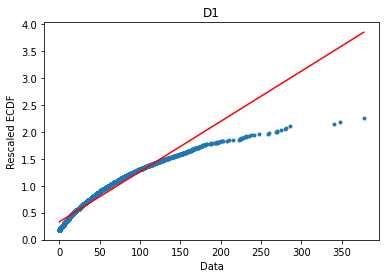

The number of truncated points is 26321


<ipython-input-106-3fda035b834a>:14: RuntimeWarning: invalid value encountered in power
  xLk   = (x/p[1])**p[0]
<ipython-input-106-3fda035b834a>:15: RuntimeWarning: invalid value encountered in double_scalars
  const = (1/p[0])+((C/p[1])**p[0])*np.log(C/p[1])
<ipython-input-106-3fda035b834a>:15: RuntimeWarning: invalid value encountered in log
  const = (1/p[0])+((C/p[1])**p[0])*np.log(C/p[1])
<ipython-input-106-3fda035b834a>:16: RuntimeWarning: invalid value encountered in log
  retK=np.dot(1-xLk,np.log(x/p[1]))+N*const
<ipython-input-106-3fda035b834a>:17: RuntimeWarning: invalid value encountered in double_scalars
  retL=np.sum(p[1]**p[0]+C**p[0]-x**p[0])


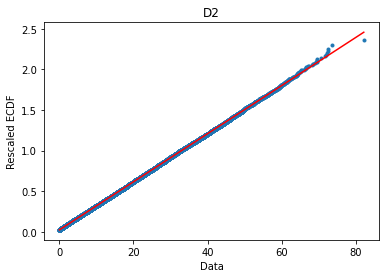

<ipython-input-106-3fda035b834a>:14: RuntimeWarning: invalid value encountered in power
  xLk   = (x/p[1])**p[0]
<ipython-input-106-3fda035b834a>:15: RuntimeWarning: invalid value encountered in double_scalars
  const = (1/p[0])+((C/p[1])**p[0])*np.log(C/p[1])
<ipython-input-106-3fda035b834a>:15: RuntimeWarning: invalid value encountered in log
  const = (1/p[0])+((C/p[1])**p[0])*np.log(C/p[1])
<ipython-input-106-3fda035b834a>:16: RuntimeWarning: invalid value encountered in log
  retK=np.dot(1-xLk,np.log(x/p[1]))+N*const
<ipython-input-106-3fda035b834a>:17: RuntimeWarning: invalid value encountered in double_scalars
  retL=np.sum(p[1]**p[0]+C**p[0]-x**p[0])


The number of truncated points is 13438


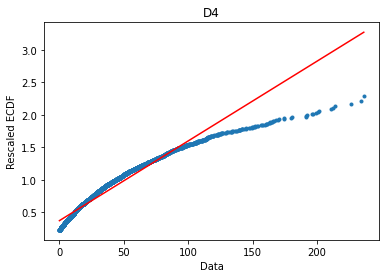

<ipython-input-106-3fda035b834a>:14: RuntimeWarning: invalid value encountered in power
  xLk   = (x/p[1])**p[0]
<ipython-input-106-3fda035b834a>:15: RuntimeWarning: invalid value encountered in double_scalars
  const = (1/p[0])+((C/p[1])**p[0])*np.log(C/p[1])
<ipython-input-106-3fda035b834a>:15: RuntimeWarning: invalid value encountered in log
  const = (1/p[0])+((C/p[1])**p[0])*np.log(C/p[1])
<ipython-input-106-3fda035b834a>:16: RuntimeWarning: invalid value encountered in log
  retK=np.dot(1-xLk,np.log(x/p[1]))+N*const
<ipython-input-106-3fda035b834a>:17: RuntimeWarning: invalid value encountered in double_scalars
  retL=np.sum(p[1]**p[0]+C**p[0]-x**p[0])


The number of truncated points is 18899


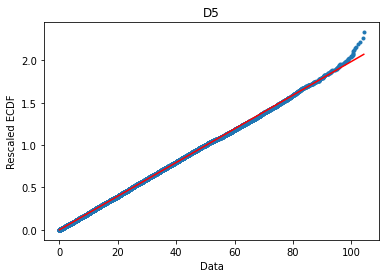

In [106]:
#Let's do Weibull and again now we will use logL'=0 to get
#parameter values
#Weibull is easy enough to do by hand without Mathematica
def Wprobplot_analysis(x,STR):
    #It helps to compute the number of data points first
    N=np.size(x)
    #Also the cutoff threshold is:
    C=1
    #And now the logL' for pdf truncated at 0
    #Again, the code is arguably simpler than for finding 
    #maximum likelihood directly
    def tW(p):
        #p[0]=k; p[1]=lambda
        xLk   = (x/p[1])**p[0]
        const = (1/p[0])+((C/p[1])**p[0])*np.log(C/p[1])
        retK=np.dot(1-xLk,np.log(x/p[1]))+N*const
        retL=np.sum(p[1]**p[0]+C**p[0]-x**p[0])
        return [retK,retL]
    #Estimate the parameters (here k and lambda)
    #0 and 100 are some random starting guesses
    soln=SciOpt.root(tW,[0.1,1],method='lm');
    #OK, now that we know the parameters roughly, we can estimate
    #the number of points that were truncated...
    #find the fraction below 1 relative to above 1
    #Our mu and sigma apply equally well to normal
    #and lognormal in this case and syntax for SciStat.norm
    #hurts my brain a lot less...
    left=SciStat.weibull_min.cdf(C/soln.x[1], soln.x[0])
    fract=left/(1-left)
    #and find how many numbers were truncated
    #from how many numbers are left
    numTR=int(fract*N); Ntot=N+numTR
    print('The number of truncated points is ' + str(numTR))
    #probplot it and see if it looks linear 
    #I choose to do this one by hand
    #first we calculate ECDF
    ecdfX=np.sort(x)
    ecdfY=np.linspace(numTR+1,Ntot,N)/Ntot
    #Now we rescale things to generate Weibull probplot
    probplotX=np.log(ecdfX[:-1])
    probplotY=np.log(-np.log(1-ecdfY[:-1]))
    #plot the result
    plt.plot(probplotX,probplotY,'.')
    #fit the data to a straight line
    #note that we exclude the zeros we prepended
    fitP=np.polyfit(probplotX[:-5],probplotY[:-5],1)
    #plot the line fit
    plt.plot(probplotX,np.polyval(fitP,probplotX),'r')
    #give it proper xlabel, ylabel, and title
    plt.xlabel('Data')
    plt.ylabel('Rescaled ECDF')
    plt.title(STR)
    plt.show()
#
Wprobplot_analysis(d1,'D1')
Wprobplot_analysis(d2,'D2')
Wprobplot_analysis(d4,'D4')
Wprobplot_analysis(d5,'D5')
#
#Conclusion #1: dist{3} is lognormal
#Conclusion #2: dist{1} and dist{4} are not but they look similar? Maybe?
#Conclusion #3: dist{2} and dist{5} are Weibull

In [ ]:
#Generalized Pareto is the most work with this approach
#In fact, the math can be set up just fine but convergence 
#is tricky and you can easily get stuck in some local minimum.
#But since it is easy to eliminate Levy via a simple hack
#we proceed to complete the problem by elimination of Levy.